In [1]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import csv
import matplotlib.pyplot as plt
%matplotlib inline


#데이터 프레임 한글 표시될 수 있도록 설정 - 윈도우, 맥, 리눅스에 맞게 설정됨
import platform


if platform.system() == 'Windows':
    plt.rc('font', family='Malgun Gothic')
elif platform.system() == 'Darwin': # Mac
    plt.rc('font', family='AppleGothic')
else: #linux
    plt.rc('font', family='NanumGothic')

# 그래프에 마이너스 표시가 되도록 변경
plt.rcParams['axes.unicode_minus'] = False

In [5]:
cyber_crime = pd.read_csv("CyberCrime.csv",index_col='연도', thousands = ',',encoding='UTF-8')
cyber_crime

,구 분,총 계,소계,해킹,DDoS,악성프로그램,기타,소계.1,사이버사기,사이버금융범죄,개인위치정보침해,사이버저작권침해,기타.1,소계.2,사이버성폭력,사이버도박,사이버명예훼손모욕,기타.2
연도,,,,,,,,,,,,,,,,,,
2018,발생,149604,2888,2178,20,119,571,123677,112000,5621,246,3856,1954,23039,3833,3012,15926,268
2018,검거,112133,902,584,14,50,254,93926,87714,2353,142,2467,1250,17305,3282,2947,10889,187
2019,발생,180499,3638,2664,35,270,669,151916,136074,10542,179,2562,2559,24945,2690,5346,16633,276
2019,검거,132559,1007,556,14,189,248,112398,105651,3387,78,1772,1510,19154,2164,5162,11632,196
2020,발생,234098,4344,3176,25,169,974,199594,174328,20248,241,2183,2594,30160,4831,5692,19388,249
2020,검거,157909,911,548,10,81,272,134696,127233,4621,95,1493,1254,22302,4063,5436,12638,165
2021,발생,217807,3845,2839,14,157,835,174648,141154,28123,217,2423,2767,39278,4349,5505,28988,436
2021,검거,138710,1254,941,6,65,242,111172,101950,6390,76,1493,1263,26284,3504,5216,17243,321
2022,발생,230355,3494,2396,30,185,883,190958,155715,28546,247,3302,3148,35903,3201,2997,29258,447


In [3]:
type(cyber_crime)

pandas.core.frame.DataFrame

In [117]:
cyber_crime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 2018 to 2022
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   구 분        10 non-null     object
 1   총 계        10 non-null     int64 
 2   소계         10 non-null     int64 
 3   해킹         10 non-null     int64 
 4   DDoS       10 non-null     int64 
 5   악성프로그램     10 non-null     int64 
 6   기타         10 non-null     int64 
 7   소계.1       10 non-null     int64 
 8   사이버사기      10 non-null     int64 
 9   사이버금융범죄    10 non-null     int64 
 10  개인위치정보침해   10 non-null     int64 
 11  사이버저작권침해   10 non-null     int64 
 12  기타.1       10 non-null     int64 
 13  소계.2       10 non-null     int64 
 14  사이버성폭력     10 non-null     int64 
 15  사이버도박      10 non-null     int64 
 16  사이버명예훼손모욕  10 non-null     int64 
 17  기타.2       10 non-null     int64 
dtypes: int64(17), object(1)
memory usage: 1.8+ KB


In [95]:
cyber_crime_occur = cyber_crime.loc[(cyber_crime['구 분']=='발생')]
cyber_crime_occur

,구 분,총 계,소계,해킹,DDoS,악성프로그램,기타,소계.1,사이버사기,사이버금융범죄,개인위치정보침해,사이버저작권침해,기타.1,소계.2,사이버성폭력,사이버도박,사이버명예훼손모욕,기타.2
연도,,,,,,,,,,,,,,,,,,
2018,발생,149604,2888,2178,20,119,571,123677,112000,5621,246,3856,1954,23039,3833,3012,15926,268
2019,발생,180499,3638,2664,35,270,669,151916,136074,10542,179,2562,2559,24945,2690,5346,16633,276
2020,발생,234098,4344,3176,25,169,974,199594,174328,20248,241,2183,2594,30160,4831,5692,19388,249
2021,발생,217807,3845,2839,14,157,835,174648,141154,28123,217,2423,2767,39278,4349,5505,28988,436
2022,발생,230355,3494,2396,30,185,883,190958,155715,28546,247,3302,3148,35903,3201,2997,29258,447


In [96]:
# 특정 열 제외
columns_to_exclude = ['기타', '소계.1','기타.1','소계.2','기타.2']
cyber_crime_occur_excluded = cyber_crime_occur.drop(columns=columns_to_exclude)

cyber_crime_occur_excluded

,구 분,총 계,소계,해킹,DDoS,악성프로그램,사이버사기,사이버금융범죄,개인위치정보침해,사이버저작권침해,사이버성폭력,사이버도박,사이버명예훼손모욕
연도,,,,,,,,,,,,,
2018,발생,149604,2888,2178,20,119,112000,5621,246,3856,3833,3012,15926
2019,발생,180499,3638,2664,35,270,136074,10542,179,2562,2690,5346,16633
2020,발생,234098,4344,3176,25,169,174328,20248,241,2183,4831,5692,19388
2021,발생,217807,3845,2839,14,157,141154,28123,217,2423,4349,5505,28988
2022,발생,230355,3494,2396,30,185,155715,28546,247,3302,3201,2997,29258


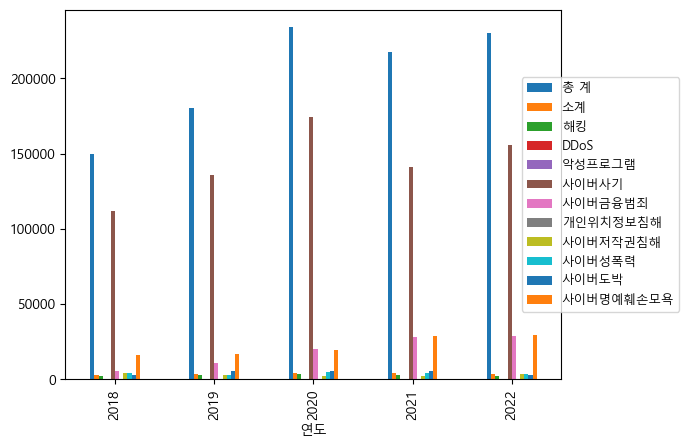

In [97]:
cyber_crime_occur_excluded.plot(kind='bar')
plt.legend(loc="right",frameon=True,fontsize=9,bbox_to_anchor=(1.25,0.5))

<Axes: xlabel='연도'>

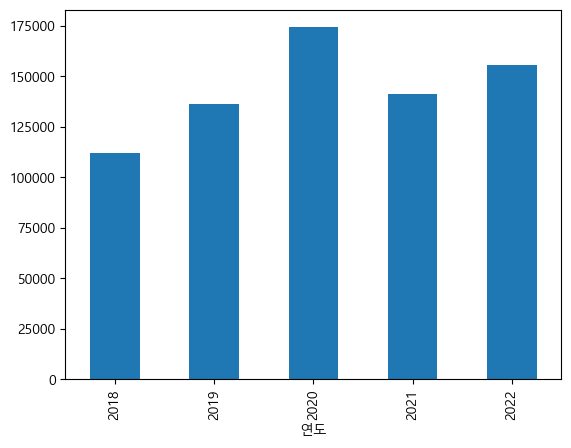

In [98]:
cyber_crime_occur['사이버사기'].plot(kind='bar')

df = df.transpose()	#행 열 전환
df.rename(columns=df.iloc[0], inplace=True)	# 행열이 전환된 데이터프레임의 열 이름 제대로 수정
df = df.drop(df.index[0])

In [6]:
new_cyber_crime=pd.read_csv("CyberCrime.csv"\, thousands = ',',encoding='UTF-8')
new_cyber_crime

,구 분,총 계,소계,해킹,DDoS,악성프로그램,기타,소계.1,사이버사기,사이버금융범죄,개인위치정보침해,사이버저작권침해,기타.1,소계.2,사이버성폭력,사이버도박,사이버명예훼손모욕,기타.2
연도,,,,,,,,,,,,,,,,,,
2018,발생,149604,2888,2178,20,119,571,123677,112000,5621,246,3856,1954,23039,3833,3012,15926,268
2018,검거,112133,902,584,14,50,254,93926,87714,2353,142,2467,1250,17305,3282,2947,10889,187
2019,발생,180499,3638,2664,35,270,669,151916,136074,10542,179,2562,2559,24945,2690,5346,16633,276
2019,검거,132559,1007,556,14,189,248,112398,105651,3387,78,1772,1510,19154,2164,5162,11632,196
2020,발생,234098,4344,3176,25,169,974,199594,174328,20248,241,2183,2594,30160,4831,5692,19388,249
2020,검거,157909,911,548,10,81,272,134696,127233,4621,95,1493,1254,22302,4063,5436,12638,165
2021,발생,217807,3845,2839,14,157,835,174648,141154,28123,217,2423,2767,39278,4349,5505,28988,436
2021,검거,138710,1254,941,6,65,242,111172,101950,6390,76,1493,1263,26284,3504,5216,17243,321
2022,발생,230355,3494,2396,30,185,883,190958,155715,28546,247,3302,3148,35903,3201,2997,29258,447


In [113]:
new_cyber_crime.index

Index(['구 분', '총 계', '소계', '해킹', 'DDoS', '악성프로그램', '기타', '소계.1', '사이버사기',
       '사이버금융범죄', '개인위치정보침해', '사이버저작권침해', '기타.1', '소계.2', '사이버성폭력', '사이버도박',
       '사이버명예훼손모욕', '기타.2'],
      dtype='object')

In [118]:
# CSV 파일로 저장 (UTF-8로 인코딩)
output_file_path = "new_cyber_crime.csv"
new_cyber_crime.to_csv(output_file_path, encoding='utf-8', index=True)


<Axes: xlabel='연도'>

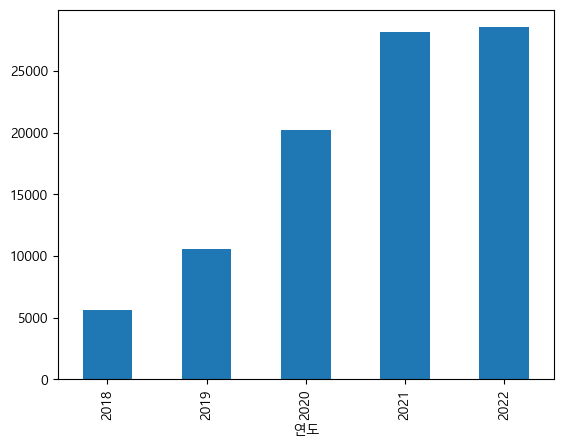

In [115]:
cyber_crime_occur['사이버금융범죄'].plot(kind='bar')

<Axes: xlabel='연도'>

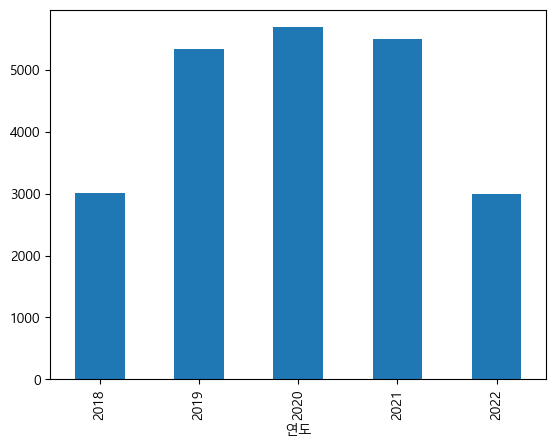

In [116]:
cyber_crime_occur['사이버도박'].plot(kind='bar')